# **Ridge and Lasso Regression Intuition**

**Ridge regression:**

Traditional linear fitting involves minimizing the RSS (residual sum of squares). In ridge regression, a new parameter is added, and now the parameters will minimize:

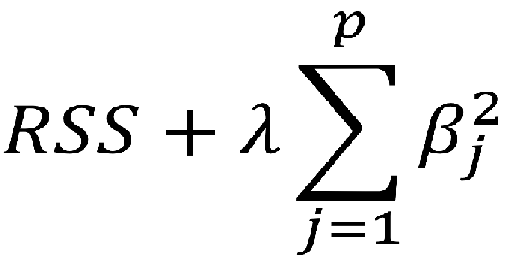


Where lambda is a tuning parameter. This parameter is found using cross-validation as it must minimize the test error. Therefore, a range of lambdas is used to fit the model and the lambda that minimizes the test error is the optimal value.

Here, ridge regression will include all p predictors in the model. Hence, it is a good method to improve the fit of the model, but it will not perform variable selection.

The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.

**Lasso Regression:**

Similarly to ridge regression, lasso will minimizes:

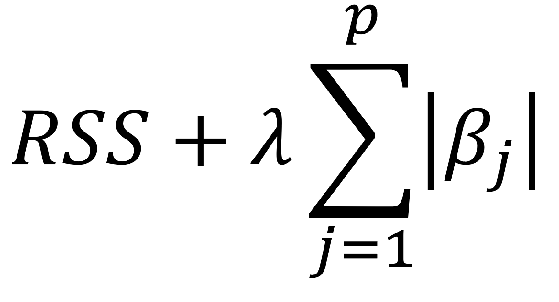

Notice that we use the absolute value of the parameter beta instead of its squared value. Also, the same tuning parameter is present.
However, if lambda is large enough, some coefficients will effectively be 0! Therefore, lasso can also perform variable selection, making the model much easier to interpret.



# RIDGE REGRESSION

# Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
7. DIS - weighted distances to five Boston employment centres
8. RAD - index of accessibility to radial highways
9. TAX - full-value property-tax rate per 10000 USD
10. PTRATIO - pupil-teacher ratio by town
11. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12. LSTAT - % lower status of the population
13. MEDV - Median value of owner-occupied homes in $1000's

# Import Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Load Dataset

In [3]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
print(boston_df)
print (boston_df.info())

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
<class 'pandas.

In [4]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
print (boston_df.head(3))

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7

[3 rows x 14 columns]


In [5]:
#Create X and Variables
newX=boston_df.drop('Price',axis=1)
print(newX.head(10))
#print newX[0:3] # check 
newY=boston_df['Price']
print(newY.head(10))

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
5  0.02985   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.12   5.21
6  0.08829  12.5   7.87   0.0  0.524  ...  5.0  311.0     15.2  395.60  12.43
7  0.14455  12.5   7.87   0.0  0.524  ...  5.0  311.0     15.2  396.90  19.15
8  0.21124  12.5   7.87   0.0  0.524  ...  5.0  311.0     15.2  386.63  29.93
9  0.17004  12.5   7.87   0.0  0.524  ...  5.0  311.0     15.2  386.71  17.10

[10 rows x 13 columns]
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: Price, dtype

# Split Dataset into Train and Test Dataset

In [0]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))
print (X_train.shape, y_train.shape)

152 152
(354, 13) (354,)


# Train with Linear Regression and Ridge Regression

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely restricted and in this case linear and ridge regression resembles

In [0]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# Evaluate the score

In [0]:
from sklearn.model_selection import cross_val_score

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576851
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123909
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921935


# Visualization

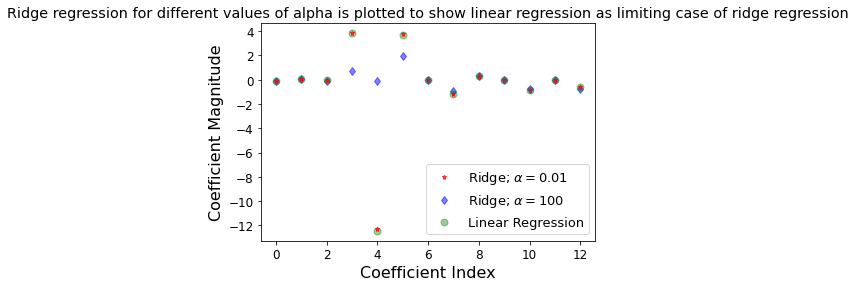

In [0]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.title('Ridge regression for different values of alpha is plotted to show linear regression as limiting case of ridge regression')
plt.legend(fontsize=13,loc=4)
plt.show()

# Interpretation

In X axis we plot the coefficient index and, for Boston data there are 13 features (for Python 0th index refers to 1st feature). For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.

# LASSO REGRESSION

This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. Just like Ridge regression the regularization parameter (lambda) can be controlled and we will see the effect below using cancer data set in sklearn. Reason I am using cancer data instead of Boston house data, that the cancer data-set have 30 features compared to only 13 features of Boston house data. So feature selection using Lasso regression can be depicted well by changing the regularization parameter.

Difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are completely neglected

# Import Libraries (already imported, so not required)

In [0]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

# Load Datasets

In [0]:
cancer = load_breast_cancer()
#print cancer.keys()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(cancer_df.head(10))
#print cancer_df.head(3)
X = cancer.data
Y = cancer.target
print(X.shape, Y.shape)


   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678
5        12.45         15.70  ...          0.3985                  0.12440
6        18.25         19.98  ...          0.3063                  0.08368
7        13.71         20.83  ...          0.3196                  0.11510
8        13.00         21.82  ...          0.4378                  0.10720
9        12.46         24.04  ...          0.4366                  0.20750

[10 rows x 30 columns]
(569, 30) (569,)


# Split the dataset into Train and test set

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

# Train with Linear regression and Lasso regression

In [0]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Evaluate the score and check number of features used for each Lasso alpha

In [0]:
from sklearn.model_selection import cross_val_score

lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)


LR training score: 0.7842206194055068
LR test score:  0.7329325010888672
training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4
training score for alpha=0.01: 0.7037865778498826
test score for alpha =0.01:  0.6641831577726228
number of features used: for alpha =0.01: 10
training score for alpha=0.0001: 0.7754092006936699
test score for alpha =0.0001:  0.7318608210757908
number of features used: for alpha =0.0001: 22


# Visualization

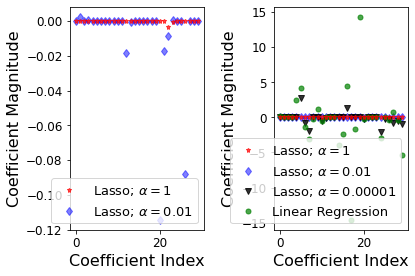

In [0]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

# Interpretation

Let’s understand the plot and the code in a short summary.
1. The default value of regularization parameter in Lasso regression (given by α) is 1.
2. With this, out of 30 features in cancer data-set, only 4 features are used (non zero value of the coefficient).
3. Both training and test score (with only 4 features) are low; conclude that the model is under-fitting the cancer data-set.
4. Reduce this under-fitting by reducing alpha and increasing number of iterations. Now α = 0.01, non-zero features =10, training and test score increases.
5. Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01.
6. Further reduce α =0.0001, non-zero features = 22. Training and test scores are similar to basic linear regression case.
7. In the right panel of figure, for α = 0.0001, coefficients for Lasso regression and linear regression show close resemblance.


# References

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://towardsdatascience.com/intro-to-linear-model-selection-and-regularization-d47bd2c5d54

https://github.com/marcopeix/ISL-Ridge-Lasso/blob/master/Lasso%20and%20Ridge%20Regression.ipynb
